In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic
from src.custom_types import Line
from src.optimisation import UnconstrainedOptimizer


In [3]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [4]:
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 1])
n = 1000
offset = 1
order = 1

In [5]:
line = Line(
    x0=np.array([0, 0]),
    direction=np.array([1, 1])
)

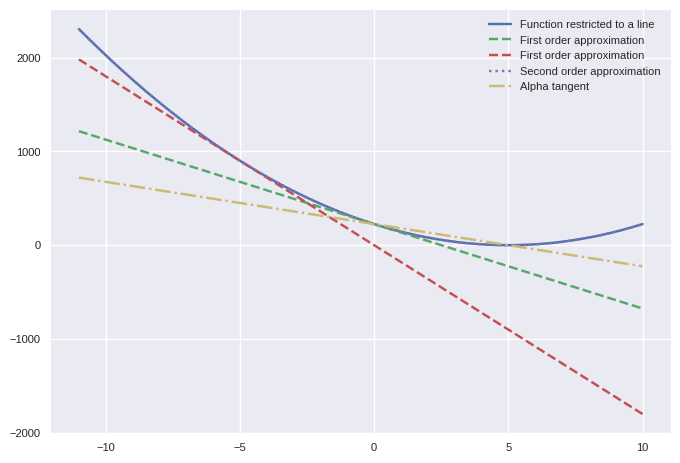

In [6]:
fig, ax = plt.subplots()

line = Line(
    x0=np.array([-5, -5]),
    direction=np.array([1, 1]),
    t_range=(-11, 10),
    n=1000
)

test_func.plot_line(line, ax=ax, label="Function restricted to a line")
test_func.plot_taylor_approximation(line, order=1, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=1, offset=-5, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=2, ax=ax, linestyle='dotted', label="Second order approximation")
test_func.plot_alpha_tangent(line, alpha=0.5, ax=ax, linestyle='-.', label="Alpha tangent")

In [7]:
# mini_hess = lambda x: x.reshape(-1, 1) @ x.reshape(1, -1)
# mu = 1e3
# # f = lambda x: np.nan_to_num(c.T @ x - np.sum(np.log(b - a @ x)), nan=np.inf)
# # g = lambda x: c - a.T @ (1 /(b - a @ x))
# # h = lambda x: -a.T @ np.diag(1 /(b - a @ x)**2) @ a
# f = lambda x: (np.log(b - a.T @ x) - np.log(b + a.T @ x))
# g = lambda x: (a / (b - a.T @ x)) - mu*(a / (b + a.T @ x))
# h = lambda x: mu*(mini_hess(a) / (b - a.T @ x)**2) + mu*(mini_hess(a) / (b + a.T @ x)**2)

In [8]:
N = 100
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))

In [9]:
ex_f = Quadratic(Q.T @ Q/10, p)
x0 = np.zeros(N)

In [10]:
pb = UnconstrainedOptimizer(ex_f, x0, method="newton")
pb.update_dir()

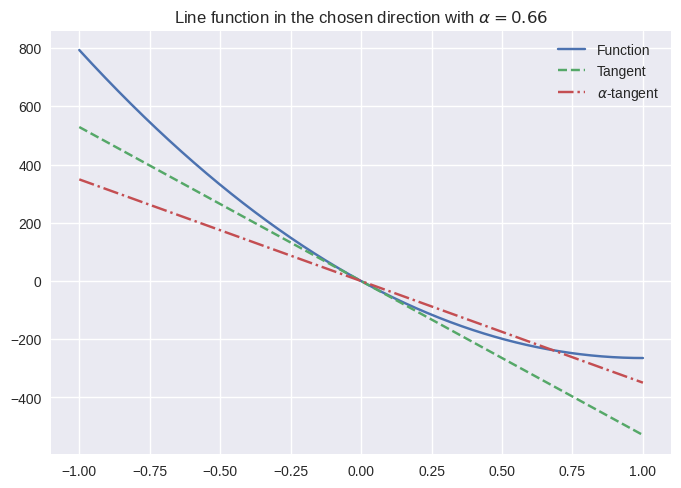

In [13]:
pb.plot_line(0.66, (-1, 1))

In [14]:
pb.optimise(1e-8, alpha=0.66, beta=0.66, verbose=True)

Step 1:
	 Criterion = 3.06e+01
	 y_1 = -2.3e+02
	 y_0 - y_1 = 2.3e+02
Step 2:
	 Criterion = 3.53e+00
	 y_2 = -2.6e+02
	 y_1 - y_2 = 27
Step 3:
	 Criterion = 4.09e-01
	 y_3 = -2.6e+02
	 y_2 - y_3 = 3.1
Step 4:
	 Criterion = 4.72e-02
	 y_4 = -2.6e+02
	 y_3 - y_4 = 0.36
Step 5:
	 Criterion = 5.46e-03
	 y_5 = -2.6e+02
	 y_4 - y_5 = 0.042
Step 6:
	 Criterion = 6.31e-04
	 y_6 = -2.6e+02
	 y_5 - y_6 = 0.0048
Step 7:
	 Criterion = 7.30e-05
	 y_7 = -2.6e+02
	 y_6 - y_7 = 0.00056
Step 8:
	 Criterion = 8.44e-06
	 y_8 = -2.6e+02
	 y_7 - y_8 = 6.5e-05
Step 9:
	 Criterion = 9.75e-07
	 y_9 = -2.6e+02
	 y_8 - y_9 = 7.5e-06
Step 10:
	 Criterion = 1.13e-07
	 y_10 = -2.6e+02
	 y_9 - y_10 = 8.6e-07
Step 11:
	 Criterion = 1.30e-08
	 y_11 = -2.6e+02
	 y_10 - y_11 = 1e-07
Step 12:
	 Criterion = 1.51e-09
	 y_12 = -2.6e+02
	 y_11 - y_12 = 1.1e-08
Last step 12:
	 Criterion = 1.51e-09
	 y_12 = -2.6e+02
	 y_11 - y_12 = 1.1e-08


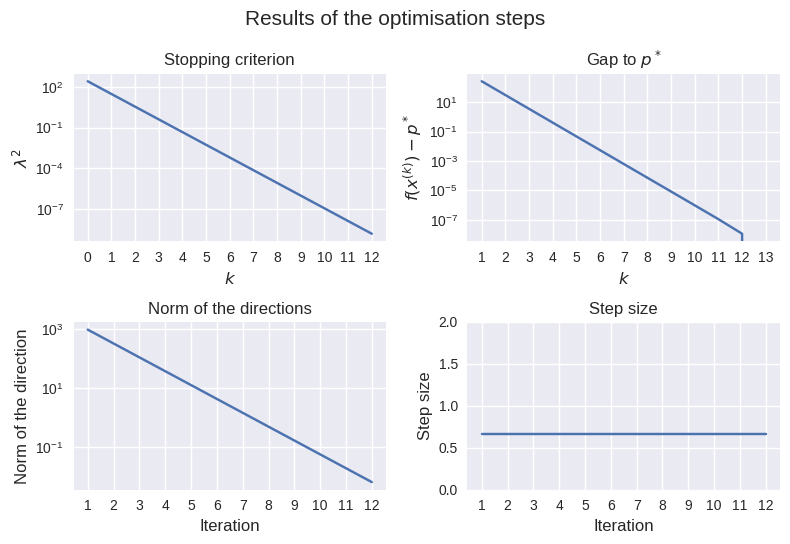

In [15]:
pbf = pb.plot_ouptuts()

\begin{equation}
\min_{x \in R^n} c^T x + \sum_{i = 1}^I \log(b_i - a_i^T x)
\end{equation}
with $N=100$ and $I=500$

In [16]:
from src.function_helper import LinearFunction, LogAffineFunction
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [17]:
N = 5
I = 2

In [18]:
c = nprd.uniform(-1, 1, size=(N, N))
b = nprd.uniform(1, 5, size=(I,))
a = nprd.uniform(-1, 1, size=(I, N))
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))
x = np.zeros(N)

In [19]:
log_aff_0 = LogAffineFunction(a[0, :], b[0])
log_aff_1 = LogAffineFunction(a[1, :], b[1])
lin_f = LinearFunction(c)
quad_f = Quadratic(Q.T @ Q/100, p)
objective = quad_f + log_aff_0 + log_aff_1

In [20]:
objective(x)

-2.1578945151406574

In [21]:
pbl = UnconstrainedOptimizer(objective, x, method="newton", max_iter=100)

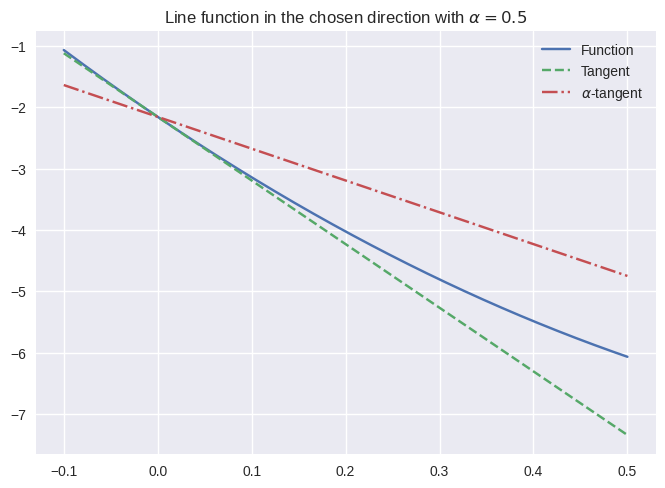

In [22]:
pbl.plot_line(0.5, t_range=(-0.1, 0.5))

In [23]:
error, alpha, beta = 1e-8, 0.4, 0.5
pbl.optimise(error, alpha, beta, verbose=True)

Step 1:
	 Criterion = 2.81e-01
	 y_1 = -7.5
	 y_0 - y_1 = 5.3
Step 2:
	 Criterion = 1.26e-01
	 y_2 = -7.8
	 y_1 - y_2 = 0.37
Step 3:
	 Criterion = 1.85e-02
	 y_3 = -8
	 y_2 - y_3 = 0.15
Step 4:
	 Criterion = 2.82e-04
	 y_4 = -8
	 y_3 - y_4 = 0.02
Step 5:
	 Criterion = 5.49e-08
	 y_5 = -8
	 y_4 - y_5 = 0.00028
Step 6:
	 Criterion = 2.04e-15
	 y_6 = -8
	 y_5 - y_6 = 5.5e-08
Last step 6:
	 Criterion = 2.04e-15
	 y_6 = -8
	 y_5 - y_6 = 5.5e-08


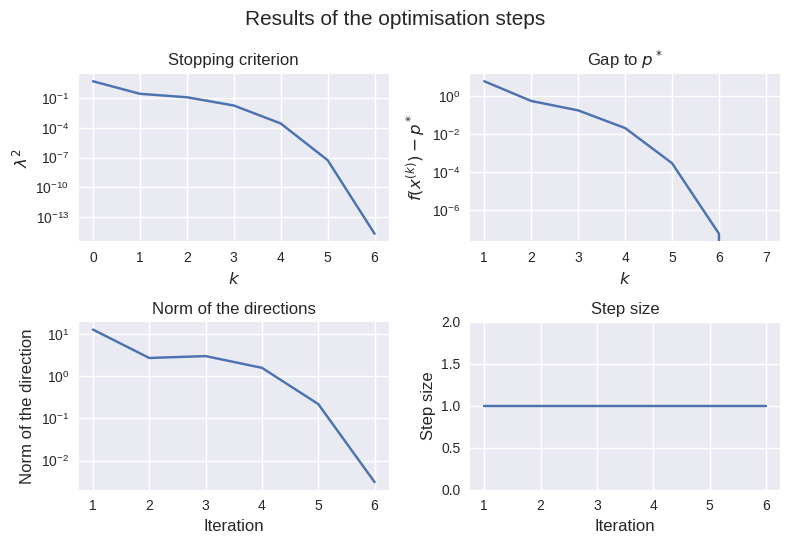

In [24]:
resfig = pbl.plot_ouptuts()